<a href="https://colab.research.google.com/github/jcchuks/ml/blob/master/deep_nn_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
ds = tf.keras.datasets
mnist = ds.mnist

In [8]:
print (dir(ds)) #trying to find out what data sets are available

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'boston_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [0]:
optimizer = "adam"
loss = "sparse_categorical_crossentropy"
(x_train, y_train), (x_test, y_test) = mnist.load_data()
metrics = ["accuracy"]
model = tf.keras.models.Sequential()


(60000, 28, 28)
(60000,)


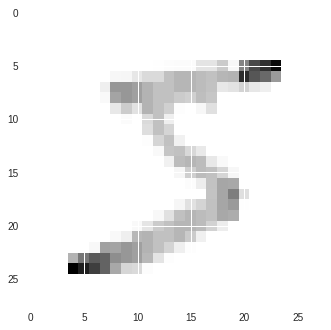

In [34]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0])
print(x_train.shape)
print (y_train.shape)

In [35]:
print (x_test.shape)
print (y_test.shape)

(10000, 28, 28)
(10000,)


In [0]:
noOfNeuronsPerHiddenLayer = 100
noOfOutputLayerNeurons = 10


In [37]:
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(noOfNeuronsPerHiddenLayer, activation=tf.nn.relu)) #hidden layer
model.add(tf.keras.layers.Dense(noOfNeuronsPerHiddenLayer, activation=tf.nn.relu)) #hidden layer
model.add(tf.keras.layers.Dense(noOfOutputLayerNeurons, activation=tf.nn.softmax)) #output layer 
model.compile(optimizer = optimizer, loss = loss, metrics = metrics) 
model.fit(x_train, y_train, epochs=3) #epoch means number of passes through the entire training data set.

Epoch 1/3
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2829 - acc: 0.9161
Epoch 2/3
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1154 - acc: 0.9645
Epoch 3/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0795 - acc: 0.9747


In [38]:
val_loss, val_acc = model.evaluate(x_test, y_test) #evaluate tests model performance

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0973 - acc: 0.9698


In [0]:
model.save("mnist_model") #saving a model with keras

In [41]:
mmodel = tf.keras.models.load_model("mnist_model")  #loading a model with keras

In [0]:
predictions = mmodel.predict(x_test) #predicts, note x_test is an array

In [45]:
print (predictions)

[[7.21104954e-10 5.68375569e-09 4.57036404e-05 ... 9.99949694e-01
  8.60421956e-09 1.59149309e-07]
 [2.15612985e-07 1.44676724e-03 9.97729242e-01 ... 8.31637522e-07
  9.43807972e-05 7.49208340e-09]
 [5.24733252e-08 9.99509454e-01 5.02600706e-05 ... 1.68749189e-04
  1.65105390e-04 1.94475069e-06]
 ...
 [6.47721654e-10 4.03370905e-07 1.50992548e-07 ... 6.37446237e-06
  2.10890562e-06 1.13995549e-04]
 [3.46157390e-06 7.10410802e-07 1.68638238e-07 ... 7.26198664e-07
  7.20347790e-03 1.14753924e-07]
 [4.87982379e-06 5.70409640e-08 1.87107992e-06 ... 1.24619515e-08
  7.19372929e-06 3.60637898e-07]]


7


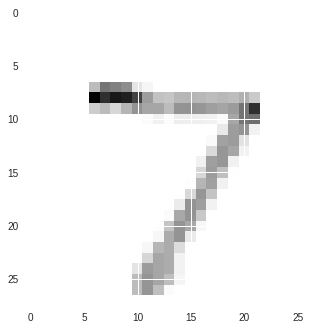

In [51]:
import numpy as np

print (np.argmax(predictions[0]))  # argmax is used to return the index of the highest value in the array. corresponds to the highest probable number
plt.imshow(x_test[0])